# Regressãp Linear Simples

<h2><a href="https://www.linkedin.com/in/fabio-henrique-rodrigues?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app " target="_blank">Fabio Henrique Rodrigues</a></h2>

Mais projetos pessoais <a href="https://sites.google.com/view/fabiohenriqueprojetos/in%C3%ADcio" target="_blank">Meu portifolio</a>

---

Este case estou trabalhando com Regressão linear simples, o intuito é analisar a correção das duas variaveis (Temperatura e luco das vendas), de uma sorvetreria.

## Importando Bibiotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf 


## conhecendo e tratandos os dataset

In [2]:
df = pd.read_csv('Ice_cream.csv')

In [3]:
df

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02
...,...,...
360,99,85.13
361,99,87.08
362,99,89.29
363,101,81.91


In [4]:
df.isnull().sum()

Temperature          0
Ice Cream Profits    0
dtype: int64

In [5]:
for coluna in df.columns:
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(" ", "_")
df

,temperature,ice_cream_profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02
...,...,...
360,99,85.13
361,99,87.08
362,99,89.29
363,101,81.91


In [6]:
df['temperatura_C'] = ((df['temperature'] - 32) * 5) / 9
df

,temperature,ice_cream_profits,temperatura_C
0,39,13.17,3.888889
1,40,11.88,4.444444
2,41,18.82,5.000000
3,42,18.65,5.555556
4,43,17.02,6.111111
...,...,...,...
360,99,85.13,37.222222
361,99,87.08,37.222222
362,99,89.29,37.222222
363,101,81.91,38.333333


## DataViz

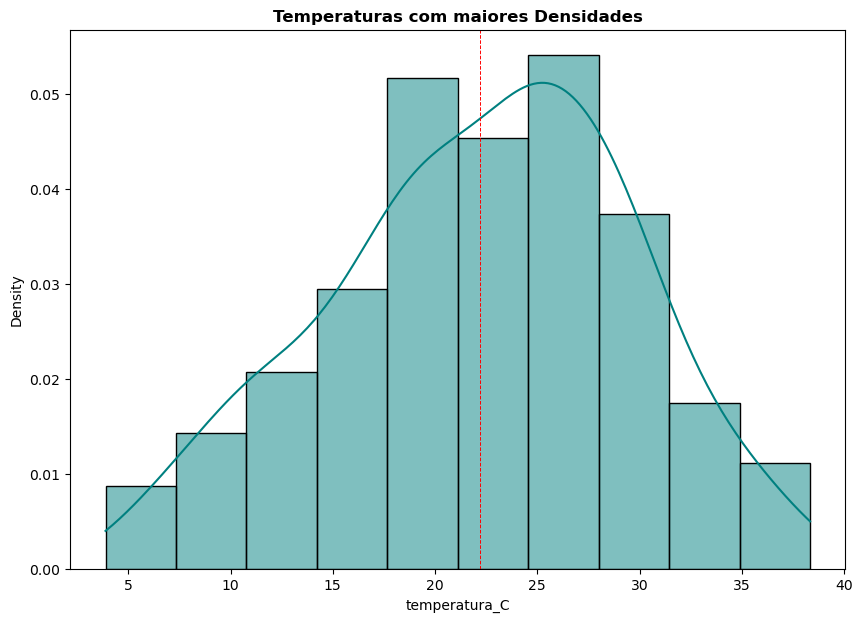

In [7]:
media_temp = np.mean(df['temperatura_C'])
plt.figure(figsize=(10,7))
sns.histplot(data=df,
             x = 'temperatura_C',
             edgecolor = 'black', 
             bins = 10,
             kde = True,
             alpha = 0.5,
             color = 'teal',
             stat='density',
             line_kws = {'color' : 'red'}
            )
plt.axvline(x=media_temp,
            linestyle= '--',
            color = 'red',
            linewidth = 0.7)
plt.title('Temperaturas com maiores Densidades',
          fontsize = 12,
          weight = 'bold')
plt.show()

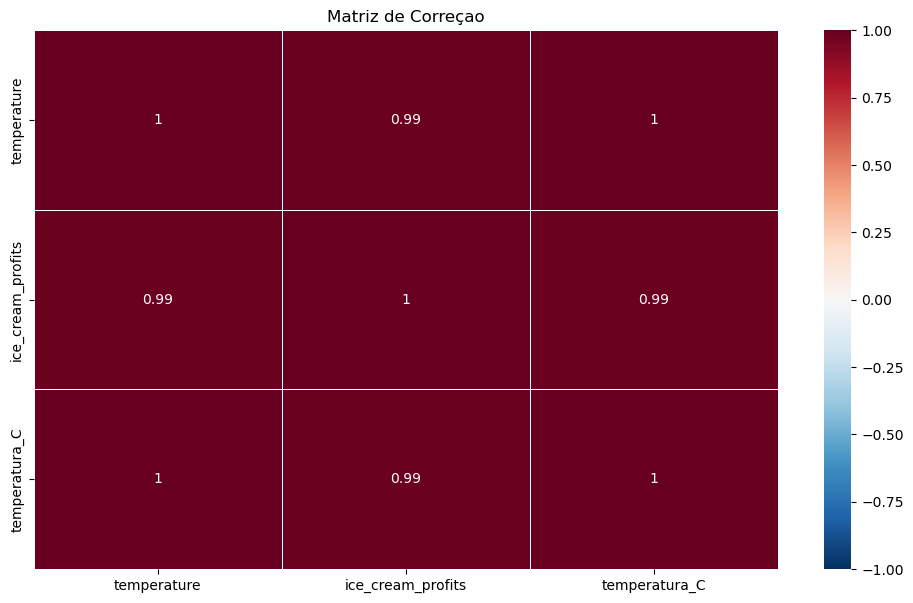

In [8]:
plt.figure(figsize=(12,7))
sns.heatmap(data=df.corr(numeric_only=True),
            annot=True,
            cmap='RdBu_r',
            vmax= 1,
            vmin= -1,
            linewidths='0.5')
plt.title('Matriz de Correçao')
plt.show()

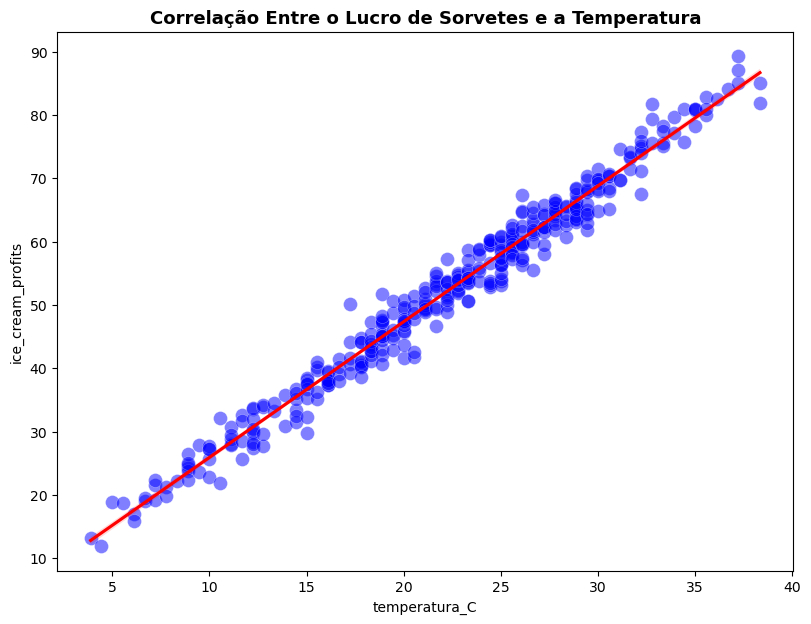

In [9]:
plt.figure(figsize=(9.5,7))
plt.scatter(data=df,
            x='temperatura_C',
            y='ice_cream_profits',
            alpha=0.5,
            edgecolor='white',
            s=100,
            linewidths=0.3,
            color = 'blue')
sns.regplot(data=df,
            x = 'temperatura_C',
            y = 'ice_cream_profits',
            scatter = False,
            color = 'red')
plt.title('Correlação Entre o Lucro de Sorvetes e a Temperatura',
          fontsize=13,
          weight = 'bold')
plt.show()

### Aqui concluimos que quanto é a maior a temperatura do dia, maior são as vendas da sorveteria.

In [10]:
modelo1 = smf.ols(formula = ' temperatura_C ~ ice_cream_profits', data=df).fit()
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:          temperatura_C   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.544e+04
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          1.57e-299
Time:                        14:53:53   Log-Likelihood:                -557.63
No. Observations:                 365   AIC:                             1119.
Df Residuals:                     363   BIC:                             1127.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.5143      0.20

### O modelo de regressão linear simples indica uma forte relação entre os lucros de sorvete e a temperatura, com 97.7% da variação na temperatura sendo explicada pelos lucros de sorvete. O coeficiente positivo sugere que, à medida que os lucros aumentam, a temperatura também aumenta, em média, 0.4554 graus Celsius por unidade de lucro. Os resultados são estatisticamente significativos, com um p-valor praticamente zero, indicando que essa relação é altamente confiável e não ocorreu por acaso.

In [11]:
modelo2 = smf.ols(formula = 'ice_cream_profits ~ temperatura_C', data=df).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:      ice_cream_profits   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.544e+04
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          1.57e-299
Time:                        14:53:53   Log-Likelihood:                -840.52
No. Observations:                 365   AIC:                             1685.
Df Residuals:                     363   BIC:                             1693.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.4461      0.404     11.003


### Com a fórmula invertida, onde os lucros de sorvete (ice_cream_profits) são a variável dependente e a temperatura (temperatura_C) é a variável explicativa, o modelo de regressão linear simples continua a mostrar uma forte relação entre as variáveis, explicando 97.7% da variação nos lucros de sorvete com base na temperatura. O coeficiente de temperatura_C (2.1456) sugere que, para cada grau Celsius a mais na temperatura, os lucros de sorvete aumentam em média 2.1456 unidades. O modelo é estatisticamente significativo, com p-valores praticamente nulos, indicando que a relação não ocorre por acaso.